<a href="https://colab.research.google.com/github/FelipePinheiro964/Steelsheets-weight-calculator/blob/main/steelsheets-weight-calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modo de uso

**Utilizar apenas arquivos `.csv UTF-8`!**

Para iniciar, utiliza capture_250205_101115.png ou as teclas `ctrl` + `enter`.
***LEIA AS INSTRUÇÕES ANTES DE INICIAR!***

---


O programa a seguir analise uma tabela padrão com medidas e espessuras de cada chapa presente no arquivo disponibilizado pelo usuario,
retornando um novo DataFrame, adicionando a coluna `Peso KG [total]`.

A tabela usa como base os dados no link https://pdf.ac/4qYuIw para o calculo, UTILIZAR ARQUIVO DE MEDIDAS EXATAS DE ESPESSURA FORNECIDAS NO SITE!

Para iniciar a leitura do seu arquivo, clique em `ficheiros` 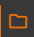 no canto superior esquerdo do site, arraste o seu arquivo para a aba aberta junto com os dados de espessura fornecidos (`steelsheets.csv`).

A aba deve ficar desta forma:

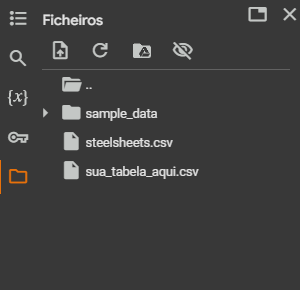

# Seleção de funções



> CASO 1


Utilizando o `caso 1`, podemos visualizar os dados da tabela `steelsheets` para fins de consulta.



> CASO 2

No segundo caso, voce deve fornecer o nome do arquivo que contem os dados de medidas e espessura das chapas (***O ARQUIVO DEVE ESTAR NA ABA FICHEIROS!***). Em seguida, sera retornado duas tabelas:
* Tabela original fornecida pelo usuario para fins de consulta;
* Tabela fornecida pelo programa.

Visualizando a tabela fornecida pelo programa, teremos a coluna "Peso KG [total]", adicionando o peso **total** de cada peça anteriormente listada.
*O resultado do peso é o somatorio de cada item, ou seja, se voce possui 2 itens, o peso somado sera o resultado.*



```
peso = (x * y * multiplicador de espessura)  * quantidade
```



> CASO 3

Para utilização da nova tabela fora do programa, utilize o terceiro caso para fazer a exportação do arquivo. Ao selecionar, digite o nome desejado para o arquivo, utillize a tecla `enter` e aguarde o arquivo na aba ficheiros 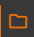 na esquerda. Feito este processo, utilize os 3 pontos ao lado do novo arquivo presente em ficheiros, e selecione `"Transferir"`.

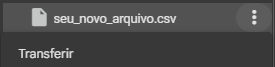


> Finalizar programa


***CERTIFIQUE DE TER FEITO TUDO NECESSARIO EM SUA CONSULTA!***
*caso nao tenha finalizado sua consulta, sera necessario reiniciar o programa e repetir os processos apos finalizado.*


Para finalizar o programa em qualquer momento, digite `"sair"`. O programa sera finalizado e pode ser reiniciado utilizando capture_250205_101115.png ou com as teclas `Ctrl` + `Enter`.






In [22]:

#Import de ferramentas
import pandas as pd

#Variavel Padrao
should_exit = False

f = "steelsheets.csv"
steelsheets = pd.read_csv(f, sep=",")



# Carregar os dados principais
print(f"O arquivo carregado deve ser obrigatoriamente .csv,\ncom colunas pre-definidas.")
print("Utilize apenas o modelo especificado!")


#################################
####### Menu de selecao #########
#################################
while True:
  print("")
  print("-------Opções de uso---------")
  print("Selecione o numero para opção desejada")
  print("Digite 'sair' para finalizar o programa")
  print("1 - Visualizar tabela de chapas")
  print("2 - Utilizar calculo de chapas")
  print("3 - Fazer download da nova tabela")
  print("Digite 'sair' para finalizar")
  print('')

  try:
    print("Selecione a opção desejada de acordo com a lista acima:")
    menu = input()
    if menu == "sair":
      should_exit = True
      break
  except:

    TypeError or ValueError or menu != "sair"
    continue

  match menu:

    case '1':
      pd.set_option('display.max.rows', None)
      print("Tabela de chapas: ")
      display(steelsheets)

    case '2':

      # Carregar os dados principais
      print("O arquivo carregado deve ser obrigatoriamente .csv,\ncom colunas padrão definidas.")
      print("Utilize apenas o modelo especificado!")

      try:
        arq = input("Escreva o nome do arquivo: ")
        if arq == "sair":
          print("Finalizando programa...")
          should_exit = True
          break
        else:
          print(arq + ".csv")
          df = pd.read_csv(arq + ".csv", sep=",")
          print("Sua tabela: ")
          display(df)
      except (ValueError, TypeError) as e:
        print("Utilize um arquivo válido ou modifique o nome.")
        should_exit = True

      if not should_exit:
        # Extraindo valores das colunas
        name = df["Nome"].values
        cod = df["Identificador"].values
        x = df["xM"].values
        y = df["yM"].values
        z = df["espessura (mm)"].values
        quant = df["quantidade"].values

        # Inicializar uma lista para armazenar os resultados
        result = []

        # Loop para iterar sobre os dados
        for i in range(len(df)):

          #Leitura de linhas
          for _, row in steelsheets.iterrows():
            espessura = row["ESPESSURAMM"]
            kg = row["PESOKGM2"]

            # Verificar se a espessura corresponde
            if espessura == z[i]:
                # Calcular peso
                peso = x[i] * y[i] * kg * quant[i]  # Cálculo do peso

                # Adicionar resultado à lista
                result.append({
                    "Peça": name[i],
                    "Codigo": cod[i],
                    "Espessura": espessura,
                    "Peso KG [total]": round(peso, 2),
                    "Dimensões": f"{x[i]} x {y[i]}",
                    "Quantidade": quant[i]
                })

      # Criar um DataFrame com os resultados
      result_df = pd.DataFrame(result)

      # Reorganizar as colunas para exibição
      result_df = result_df[["Peça", "Codigo", "Espessura", "Peso KG [total]", "Dimensões", "Quantidade"]]

      # Exibir a tabela com os resultados
      print("Resultados: ")
      display(result_df)

    case '3':
        name = input("Insira um nome para tabela: ")
        if name == "sair":
          print("Finalizando programa...")
          should_exit = True
          break
        else:
          result_df.to_csv(name + ".csv", index=False, encoding='utf-8')


O arquivo carregado deve ser obrigatoriamente .csv,
com colunas pre-definidas.
Utilize apenas o modelo especificado!

-------Opções de uso---------
Selecione o numero para opção desejada
Digite 'sair' para finalizar o programa
1 - Visualizar tabela de chapas
2 - Utilizar calculo de chapas
3 - Fazer download da nova tabela
Digite 'sair' para finalizar

Selecione a opção desejada de acordo com a lista acima:
2
O arquivo carregado deve ser obrigatoriamente .csv,
com colunas padrão definidas.
Utilize apenas o modelo especificado!
Escreva o nome do arquivo: sair
Finalizando programa...
